In [13]:
import qsharp
from PhaseEstimation import run
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import linregress

In [15]:
# Define a model function to fit (you need to define an appropriate function based on your data)
def model_function(x, a, b):
    # Ensure x is a numpy array for element-wise operations
    x = np.array(x)
    return b / (pow(x,a))

### Variate n_shots

In [112]:
def n_shots_experiment(phi=0, shots=100, n_oracle=10):
    results_shots = []
    for n_shots in range(1, shots + 1):
        repeat = 20
        result = 0
        tmp = []
        for s in range(1, repeat + 1):
            res = run.simulate(nShots=n_shots, phi=phi, oraclePower=n_oracle)
            result = res[1]
            result = np.abs(2 / n_oracle * (np.arcsin(np.sqrt(result / n_shots)) - np.pi / 4) - phi)
            tmp.append(result)
        results_shots.append(np.mean(tmp))
    return results_shots

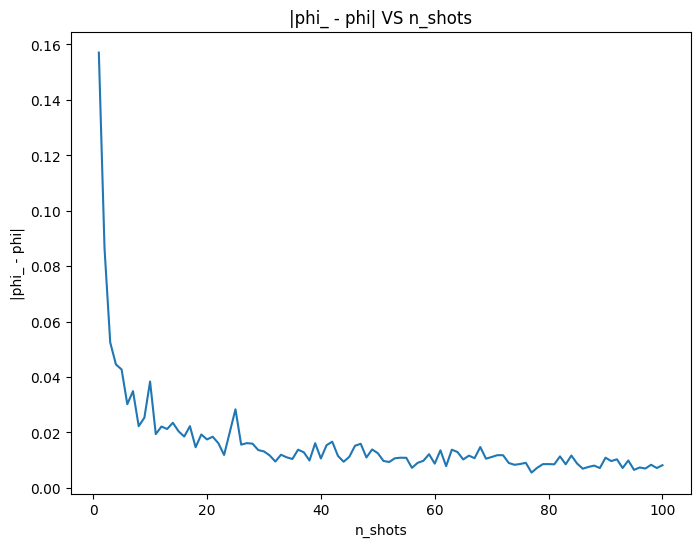

In [113]:
n_oracle = 1
phi = 0
n_shots = 100
results = n_shots_experiment(shots=n_shots)
plt.figure(figsize=(8,6))
plt.plot(list(range(1, n_shots + 1)), results)
plt.xlabel('n_shots')
plt.ylabel('|phi_ - phi|')
plt.title('|phi_ - phi| VS n_shots')
plt.show()

### Linear regression

alpha = -0.5517353332444483


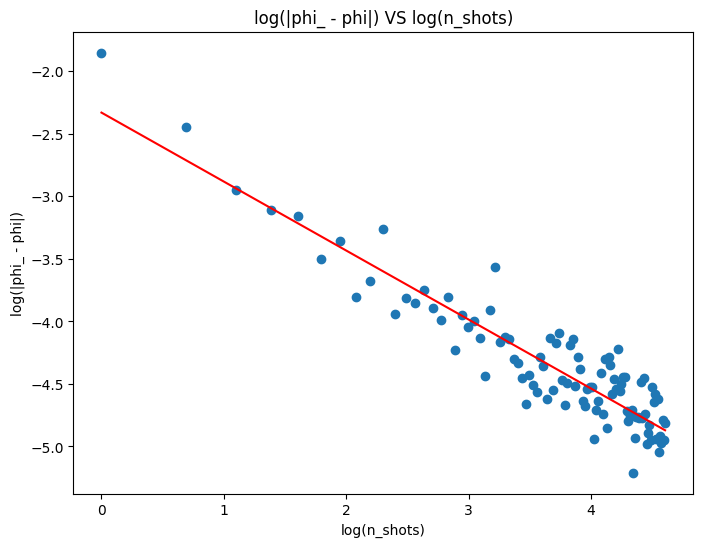

In [115]:
log_shots = np.log(list(range(1, n_shots + 1)))
alpha, intercept, _, _, _ = linregress(log_shots, np.log(results))
print(f"alpha = {alpha}")
plt.figure(figsize=(8,6))
plt.plot(np.log(list(range(1, n_shots + 1))), intercept + alpha * np.log(list(range(1, n_shots + 1))), label='Linear Fit', color='red')
plt.scatter(log_shots, np.log(results), label='Logarithmic Data')
plt.xlabel('log(n_shots)')
plt.ylabel('log(|phi_ - phi|)')
plt.title('log(|phi_ - phi|) VS log(n_shots)')
plt.show()

### Variate n_oracles

In [105]:
def n_oracle_experiment(phi=0, shots=100, n_oracle=10):
    results_oracles = []
    for n in range(1, n_oracle + 1):
        repeat = 20
        result = 0
        tmp = []
        for s in range(1, repeat + 1):
            res = run.simulate(nShots=shots, phi=phi, oraclePower=n)
            result = res[1]
            result = np.abs(2 / n * (np.arcsin(np.sqrt(result / shots)) - np.pi / 4) - phi)
            tmp.append(result)
        results_oracles.append(np.mean(tmp))
    return results_oracles

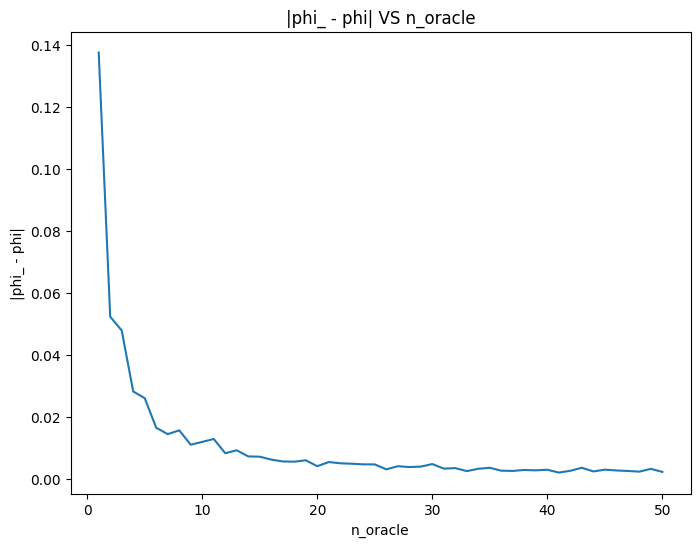

In [116]:
n_oracle = 50
shots = 50
results = n_oracle_experiment(shots=shots, n_oracle=n_oracle)
plt.figure(figsize=(8,6))
plt.plot(list(range(1, n_oracle + 1)), results)
plt.xlabel('n_oracle')
plt.ylabel('|phi_ - phi|')
plt.title('|phi_ - phi| VS n_oracle')
plt.show()

### Linear regression

alpha = -1.02785363803254


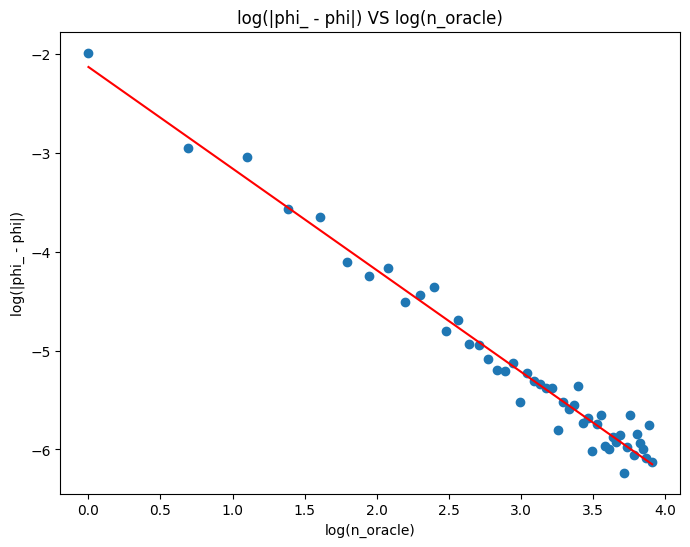

In [117]:
log_oracles = np.log(list(range(1, n_oracle + 1)))
alpha, intercept, _, _, _ = linregress(log_oracles, np.log(results))
print(f"alpha = {alpha}")
plt.figure(figsize=(8,6))
plt.plot(log_oracles, intercept + alpha * log_oracles, label='Linear Fit', color='red')
plt.scatter(log_oracles, np.log(results), label='Logarithmic Data')
plt.xlabel('log(n_oracle)')
plt.ylabel('log(|phi_ - phi|)')
plt.title('log(|phi_ - phi|) VS log(n_oracle)')
plt.show()